<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [3]:
ensios = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [5]:
!pip install pyDOE2
import pyDOE2 as doe

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25538 sha256=acb0d4b319ebb1bea213a137df74f8a8ae6fd066e8f5a3ae36bef00c7c17cb24
  Stored in directory: /root/.cache/pip/wheels/a7/56/10/2dcc175569666fb8af5c210980eb5833befd399780e71e6749
Successfully built pyDOE2

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## Costruindo um planejamento fatorial de 2²


In [8]:
ensaios = doe.ff2n(2) #Ensaios fatoriais com dois níveis (inferior e superior)

In [9]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [10]:
experimento = pd.DataFrame(ensios, columns = ['farinha','chocolate'] )

In [13]:
experimento

,farinha,chocolate
0,-1,-1
1,1,-1
2,-1,1
3,1,1


### Inserindo coluna com os resultados 

In [14]:
experimento['porcoes']= [19,37,24,49]

In [15]:
experimento

,farinha,chocolate,porcoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [17]:
import seaborn as sns

In [18]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
#CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges,
#Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, 
#PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, 
#RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, 
#Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, 
#binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
#copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, 
#gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
#gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, 
#jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r,
#prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10,
#tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, 
#winter_r

sns.set_palette('terrain')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')


### Para a farinha

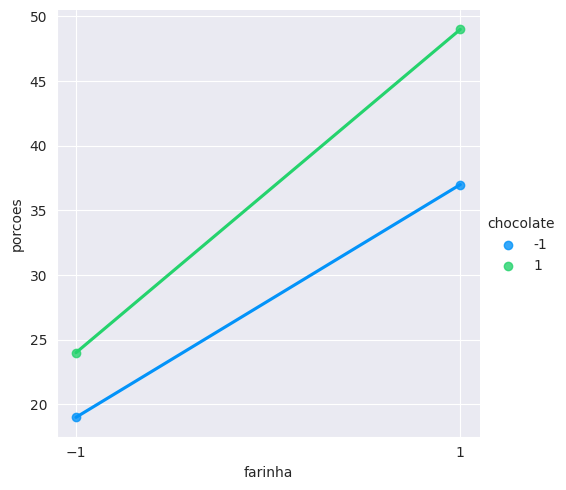

In [23]:
ax1 = sns.lmplot(data=experimento, x = 'farinha', y='porcoes', ci=None, hue = 'chocolate')

ax1.set(xticks = (-1,1))

### Para o chocolate

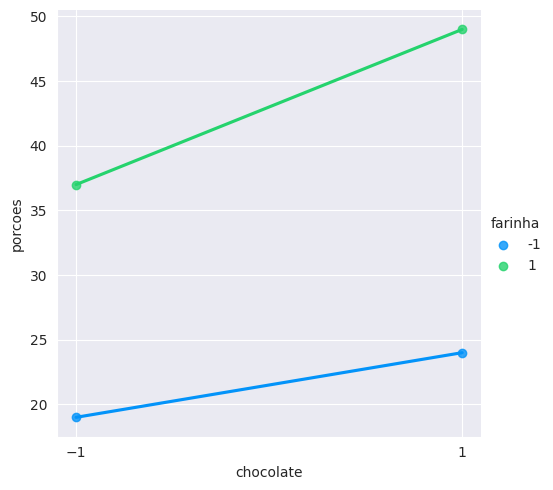

In [24]:
ax2 = sns.lmplot(data=experimento, x = 'chocolate', y='porcoes', ci=None, hue = 'farinha')

ax2.set(xticks = (-1,1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### .

In [28]:
modelo = smf.ols(data=experimento, formula = 'porcoes ~ farinha + chocolate + farinha:chocolate')

In [29]:
modelo_ajustado = modelo.fit()

In [30]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 11 Jul 2023   Prob (F-statistic):                nan
Time:                        15:43:08   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.9/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.s

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [31]:
centro = np.array([  [0,0,29],
                     [0,0,30],
                     [0,0,29],
                     [0,0,30], ])

In [32]:
centro_dataframe= pd.DataFrame(centro, columns = ['farinha', 'chocolate', 'porcoes'], index = [4,5,6,7])

In [33]:
centro_dataframe

,farinha,chocolate,porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [34]:
experimento = experimento.append(centro_dataframe)

/tmp/ipykernel_85/292207606.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  experimento = experimento.append(centro_dataframe)


In [35]:
experimento

,farinha,chocolate,porcoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [36]:
modelo = smf.ols(data= experimento, formula = 'porcoes~ farinha+chocolate+farinha:chocolate')

In [37]:
modelo_ajustado = modelo.fit()

In [38]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Tue, 11 Jul 2023   Prob (F-statistic):            0.00152
Time:                        16:03:10   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [41]:
t_valores = modelo_ajustado.tvalues

In [42]:
t_valores

Intercept            43.494275
farinha              10.708252
chocolate             4.233495
farinha:chocolate     1.743204
dtype: float64

In [43]:
nome = t_valores.index.tolist()

In [44]:
nome

['Intercept', 'farinha', 'chocolate', 'farinha:chocolate']

### .

In [46]:
from scipy import stats

### .


In [47]:
distribuicao = stats.t(df = 4) #df =4 é o grau de liberdade dos residuos

In [48]:
distribuicao.ppf(q= 1-.025) # q representa o 100 - 0,25 = 100 - grau de significancia /2 

2.7764451051977987

In [49]:
limite = [distribuicao.ppf(q= 1-.025)]*len(nome)

In [50]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

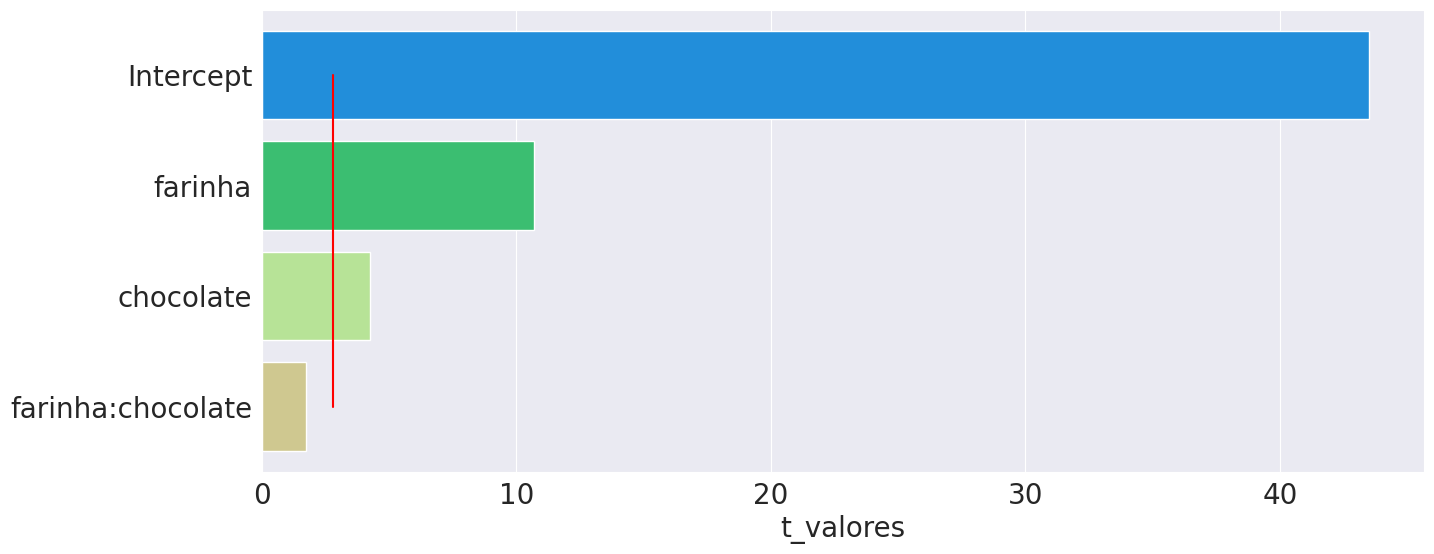

In [52]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t_valores', fontsize=20)

pareto.plot(limite, nome, 'r')

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [53]:
modelo_2 = smf.ols(data=experimento, formula = 'porcoes~farinha+chocolate')

In [54]:
modelo_ajustado_2 = modelo_2.fit()

In [55]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           0.000571
Time:                        16:42:10   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [56]:
t_valores = modelo_ajustado_2.tvalues

In [57]:
t_valores

Intercept    36.658022
farinha       9.025173
chocolate     3.568092
dtype: float64

In [59]:
nome = t_valores.index.tolist()

In [60]:
nome

['Intercept', 'farinha', 'chocolate']

### .

In [63]:
distribuicao = stats.t(df = 5)

In [65]:
distribuicao.ppf(q = 1 - 0.025)

2.5705818366147395

In [66]:
limite = [distribuicao.ppf(q = 1 - 0.025)]*len(nome)

### Plotando o gráfico

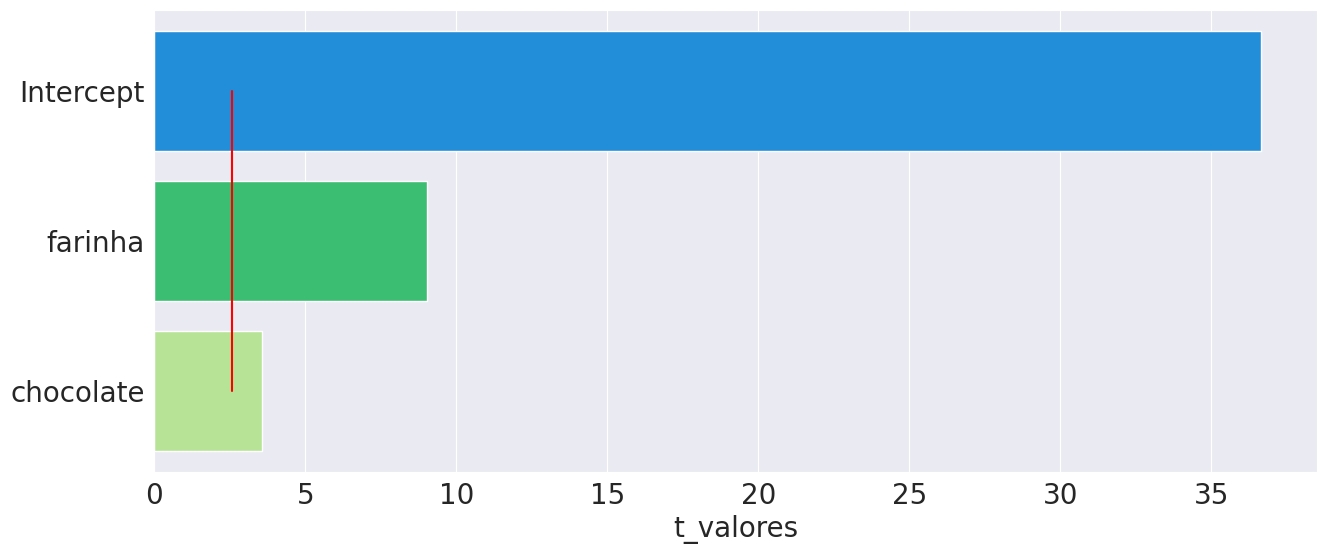

In [67]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t_valores', fontsize=20)

pareto.plot(limite, nome, 'r')

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [69]:
observados = experimento['porcoes']

In [70]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: porcoes, dtype: int64

### .

In [71]:
preditos = modelo_ajustado_2.predict()

In [72]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [73]:
import matplotlib.pyplot as plt

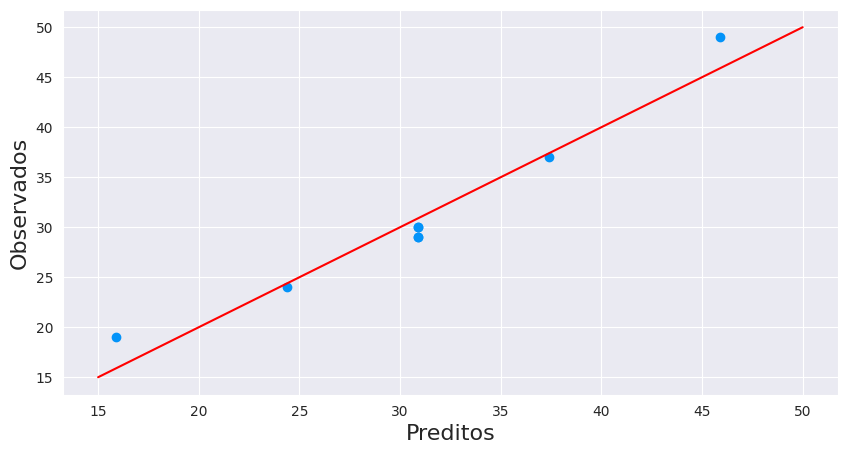

In [78]:
plt.figure(figsize = (10,5))

plt.xlabel('Preditos', fontsize = 16)

plt.ylabel('Observados', fontsize = 16)

#linha de guia
x = np.linspace(start = 15, stop = 50, num = 10)

y = np.linspace(start = 15, stop = 50, num = 10)

plt.plot(x,y, 'r')

#comparação

plt.scatter(preditos, observados)


<hr>

In [79]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           0.000571
Time:                        17:20:26   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [80]:
parametros= modelo_ajustado_2.params

In [81]:
parametros

Intercept    30.875
farinha      10.750
chocolate     4.250
dtype: float64

### .

### Definindo a função

In [86]:
def modelo_receita(x_f, x_c):
    
    #limite
    limite_normalizado = [-1,1]
    
    limite_farinha = [0.5,1.5]
    
    limite_chocolate = [0.1,0.5]
    
    #converter
    x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)
    x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)
    
    porcoes= parametros['Intercept']+ parametros['farinha']*x_f_convertido + parametros ['chocolate']*x_c_convertido
    
    return round(porcoes)


In [88]:
modelo_receita(0.5,0.1)

16


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [89]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [90]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [93]:
pontos= []

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

In [ ]:
for cont1 in x_farinha:
    temp = []
    for cont2 in x_chocolate:
        temp.append(modelo_receita(cont1,cont2))
    pontos.append(temp)

In [95]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construindo a superfície de resposta

In [98]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 7 text.Text objects>

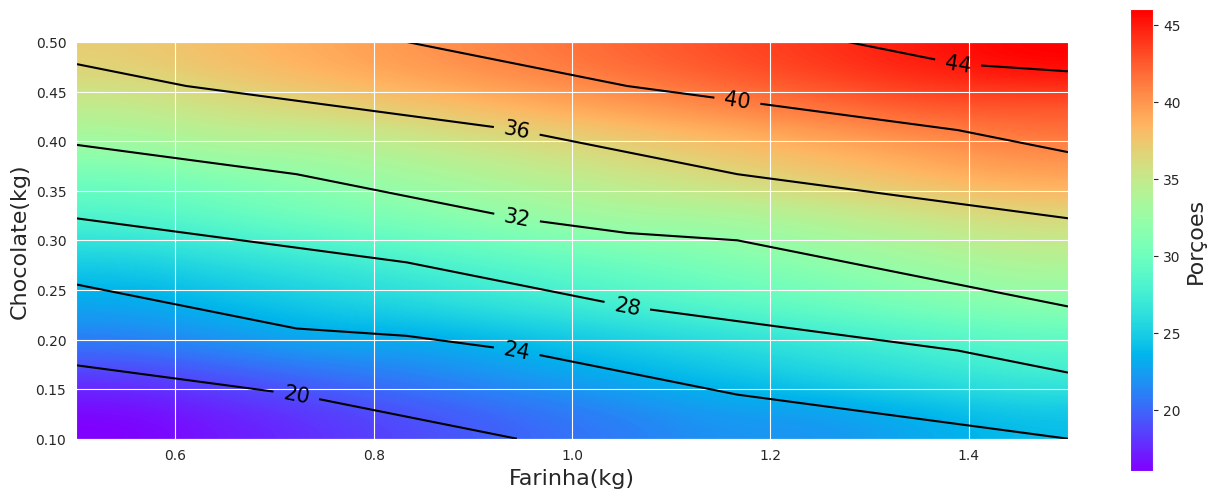

In [105]:
#base
plt.figure(figsize = (16,6))
plt.xlabel ('Farinha(kg)', fontsize = 16)
plt.ylabel ('Chocolate(kg)', fontsize = 16)

#mapa de cores
mapa_cor = plt.imshow(pontos, origin= 'lower', cmap = cm.rainbow, interpolation = 'quadric', extent = (0.5,1.5,0.1,0.5))

#barra de cor

plt.colorbar().set_label('Porçoes', fontsize = 16)

#linha

linhas = plt.contour(x_farinha, x_chocolate, pontos, colors = 'k', linewidths =1.5)

plt.clabel(linhas, inline = True, fontsize= 15.0, inline_spacing = 10)